In [1]:
import pandas as pd

In [2]:
#import csv file
data=pd.read_csv('insurance.csv')

In [3]:
encoded_data=pd.get_dummies(data)

In [4]:
X=encoded_data.drop('charges',axis=1)
Y=encoded_data['charges']
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False


In [5]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [6]:
import tensorflow as tf

In [7]:
# set seed first
tf.random.set_seed(42)

#use callback to stop training when loss is less than 40% of the original loss
callback=tf.keras.callbacks.EarlyStopping(monitor='loss',patience=20,mode='min')

# 1. Create model
insurance_model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(100),
        tf.keras.layers.Dense(50),
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1),
    ]
)

# 2. Compile model
insurance_model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.AdamW(learning_rate=0.001),
    metrics=["mae"],
)

# 3. Fit model
history = insurance_model.fit(
    X_train.astype("float32"), Y_train.astype("float32"), epochs=150, callbacks=[callback]
)

Epoch 1/150
34/34 [==============================] - 4s 7ms/step - loss: 13100.0430 - mae: 13100.0430
Epoch 2/150
34/34 [==============================] - 0s 7ms/step - loss: 11731.6338 - mae: 11731.6338
Epoch 3/150
34/34 [==============================] - 0s 7ms/step - loss: 8319.3389 - mae: 8319.3389
Epoch 4/150
34/34 [==============================] - 0s 8ms/step - loss: 7431.8706 - mae: 7431.8706
Epoch 5/150
34/34 [==============================] - 0s 7ms/step - loss: 7347.7505 - mae: 7347.7505
Epoch 6/150
34/34 [==============================] - 0s 7ms/step - loss: 7305.4351 - mae: 7305.4351
Epoch 7/150
34/34 [==============================] - 0s 4ms/step - loss: 7237.5659 - mae: 7237.5659
Epoch 8/150
34/34 [==============================] - 0s 3ms/step - loss: 7179.9443 - mae: 7179.9443
Epoch 9/150
34/34 [==============================] - 0s 3ms/step - loss: 7119.2329 - mae: 7119.2329
Epoch 10/150
34/34 [==============================] - 0s 4ms/step - loss: 7058.1821 - mae: 7058.

In [8]:
#evaluate model
insurance_model.evaluate(X_test.astype('float32'),Y_test.astype('float32'))

9/9 [==============================] - 0s 4ms/step - loss: 3159.3159 - mae: 3159.3159


[3159.31591796875, 3159.31591796875]

Text(0, 0.5, 'loss')

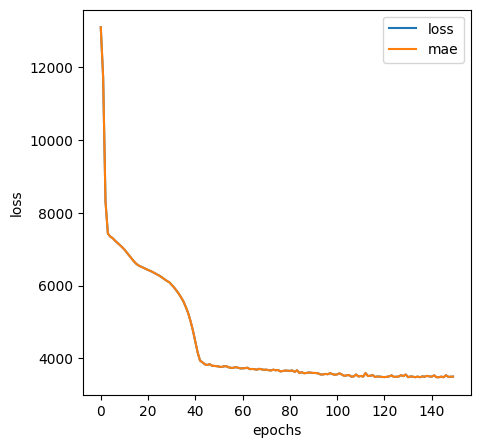

In [9]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(5, 5))
plt.xlabel("epochs")
plt.ylabel("loss")

In [10]:
import pandas as pd
insurance_data=pd.read_csv('insurance.csv')
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [11]:
# coulumn transformer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"]),
)

# create X & Y
X=insurance_data.drop('charges',axis=1)
Y=insurance_data['charges']

# split data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

# fit column transformer to training data
ct.fit(X_train)

# transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal=ct.transform(X_train)
X_test_normal=ct.transform(X_test)


In [12]:
# set seed first
import tensorflow as tf
tf.random.set_seed(42)

# 1. Create model
insurance_model2 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dense(50, activation='relu'),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(1),
    ]
)
# 2. Compile model
insurance_model2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.AdamW(learning_rate=0.001),
    metrics=["mae"],
)
# 3. Fit model
history = insurance_model2.fit(
    X_train_normal.astype("float32"), Y_train.astype("float32"), epochs=150
)

Epoch 1/150
34/34 [==============================] - 3s 8ms/step - loss: 13343.8760 - mae: 13343.8760
Epoch 2/150
34/34 [==============================] - 0s 4ms/step - loss: 13328.7695 - mae: 13328.7695
Epoch 3/150
34/34 [==============================] - 0s 4ms/step - loss: 13256.0732 - mae: 13256.0732
Epoch 4/150
34/34 [==============================] - 0s 4ms/step - loss: 13014.8623 - mae: 13014.8623
Epoch 5/150
34/34 [==============================] - 0s 5ms/step - loss: 12420.5264 - mae: 12420.5264
Epoch 6/150
34/34 [==============================] - 0s 4ms/step - loss: 11278.3301 - mae: 11278.3301
Epoch 7/150
34/34 [==============================] - 0s 4ms/step - loss: 9805.7441 - mae: 9805.7441
Epoch 8/150
34/34 [==============================] - 0s 4ms/step - loss: 8567.0146 - mae: 8567.0146
Epoch 9/150
34/34 [==============================] - 0s 4ms/step - loss: 7997.2422 - mae: 7997.2422
Epoch 10/150
34/34 [==============================] - 0s 4ms/step - loss: 7819.8149 - ma

In [14]:
#predict model
insurance_model2.predict(X_test_normal.astype('float32'))

#evaluate model
insurance_model2.evaluate(X_test_normal.astype('float32'),Y_test.astype('float32'))

9/9 [==============================] - 0s 3ms/step - loss: 2786.4631 - mae: 2786.4631


[2786.463134765625, 2786.463134765625]